In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from tensorflow.keras.models import Sequential

2021-12-13 11:55:18.348967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 11:55:18.350135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
from tensorflow.keras.layers import LSTM,Dropout,Dense

## Reading Training Data

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [9]:
training_set = dataset_train.iloc[:, 1:2].values

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))

In [11]:
training_set_scaled = sc.fit_transform(training_set)

In [12]:
X_train = []
y_train = []

In [13]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Creating the Stock Price Prediction Model.

In [15]:
regressor = Sequential()

2021-12-13 11:55:31.838752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-13 11:55:31.842557: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-13 11:55:31.843472: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (JYashu): /proc/driver/nvidia/version does not exist
2021-12-13 11:55:31.856076: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Adding 1st LSTM Layer

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding 2nd LSTM Layer

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding 3rd LSTM Layer

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding 4th LSTM Layer

In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding Output Layer

In [20]:
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

## Training the Stock Price Prediction Model.

In [23]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

2021-12-13 11:55:43.279662: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
38/38 [==============================] - 19s 209ms/step - loss: 0.0345
Epoch 2/100
38/38 [==============================] - 10s 261ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 12s 306ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 13s 350ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 8s 206ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 8s 222ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 12s 325ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 13s 343ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 12s 316ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 10s 254ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 12s 315ms/step - loss: 0.0039
Epo

38/38 [==============================] - 8s 204ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0014


## Reading Test Data

In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

## Getting the Stock Price Predictions on Test Data

In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [27]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [28]:
X_test = []

In [29]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [30]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Plotting the Predictions and Real Data

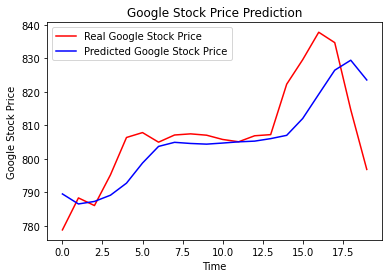

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()